In [66]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [67]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
ratings = []
# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    div_elements = parsed_content.find_all('div', class_='rating-10')
    i=0
    for div_element in div_elements:
        if i!=0 :
          span_element = div_element.find("span")
          #if span_element:
          rating = span_element.text
          ratings.append(rating)
        else :
          i=1

    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print(len(reviews),len(ratings))

Scraping page 1
100 100
Scraping page 2
200 200
Scraping page 3
300 300
Scraping page 4
400 400
Scraping page 5
500 500
Scraping page 6
600 600
Scraping page 7
700 700
Scraping page 8
800 800
Scraping page 9
900 900
Scraping page 10
1000 1000


In [68]:
df = pd.DataFrame()
df["reviews"] = reviews
df["ratings"] = ratings
df.head()

,reviews,ratings
0,✅ Trip Verified | Came from Glasgow to London...,1
1,✅ Trip Verified | My flight on on 12 May 2023...,1
2,Not Verified | Cairo is a 5 hour flight and B...,2
3,✅ Trip Verified | After travelling London to ...,1
4,✅ Trip Verified | My luggage was mis-tagged i...,1


In [69]:
df.to_csv("/content/drive/MyDrive/Reviews.csv")

In [70]:
df = pd.read_csv("/content/drive/MyDrive/Reviews.csv")

In [71]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [72]:
df.head()

,reviews,ratings
0,✅ Trip Verified | Came from Glasgow to London...,1
1,✅ Trip Verified | My flight on on 12 May 2023...,1
2,Not Verified | Cairo is a 5 hour flight and B...,2
3,✅ Trip Verified | After travelling London to ...,1
4,✅ Trip Verified | My luggage was mis-tagged i...,1


In [73]:
import re
n,m = df.shape
list=[]
for i in range(n):
  string = df.iloc[i,0]
  pattern = r"\| (.+)"

  match = re.search(pattern, string)
  if match:
    extracted_text = match.group(1)
    list.append(extracted_text)
df.drop('reviews',axis=1,inplace=True)
df['reviews']=pd.Series(list)
df.head()

,ratings,reviews
0,1,Came from Glasgow to London and took connecti...
1,1,My flight on on 12 May 2023 got delayed an ho...
2,2,Cairo is a 5 hour flight and BA considers it ...
3,1,After travelling London to Madrid with Britis...
4,1,My luggage was mis-tagged in Dallas on my way...


In [74]:
df['reviews'][0]

" Came from Glasgow to London and took connecting flight American Airlines from London to North Carolina. It's my third day here in North Carolina and still waiting for my luggage. They didn't even bother to transfer the luggage to connecting flight. Luggage are still in Glasgow. "

In [75]:
!pip install wordcloud

In [76]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [77]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [78]:
df.dtypes

ratings     int64
reviews    object
dtype: object

In [79]:
from nltk.stem import WordNetLemmatizer
def processing(comment):
  #print(type(comment))
  #comment.astype(str)
  final = []
  wnl = WordNetLemmatizer()
  alphaPattern = "[^a-zA-Z0-9]"
  for com in comment:
    if type(com)!=float:
      com = com.lower()
      com = re.sub(alphaPattern, " ", com)
      words = ''
      for word in com.split():
        if word not in stopwordlist:
          if len(word)>1:
            word = wnl.lemmatize(word)
            words += (word+' ')

      final.append(words)
    else :
      final.append(com)
  return final


In [80]:
final = processing(df['reviews'])

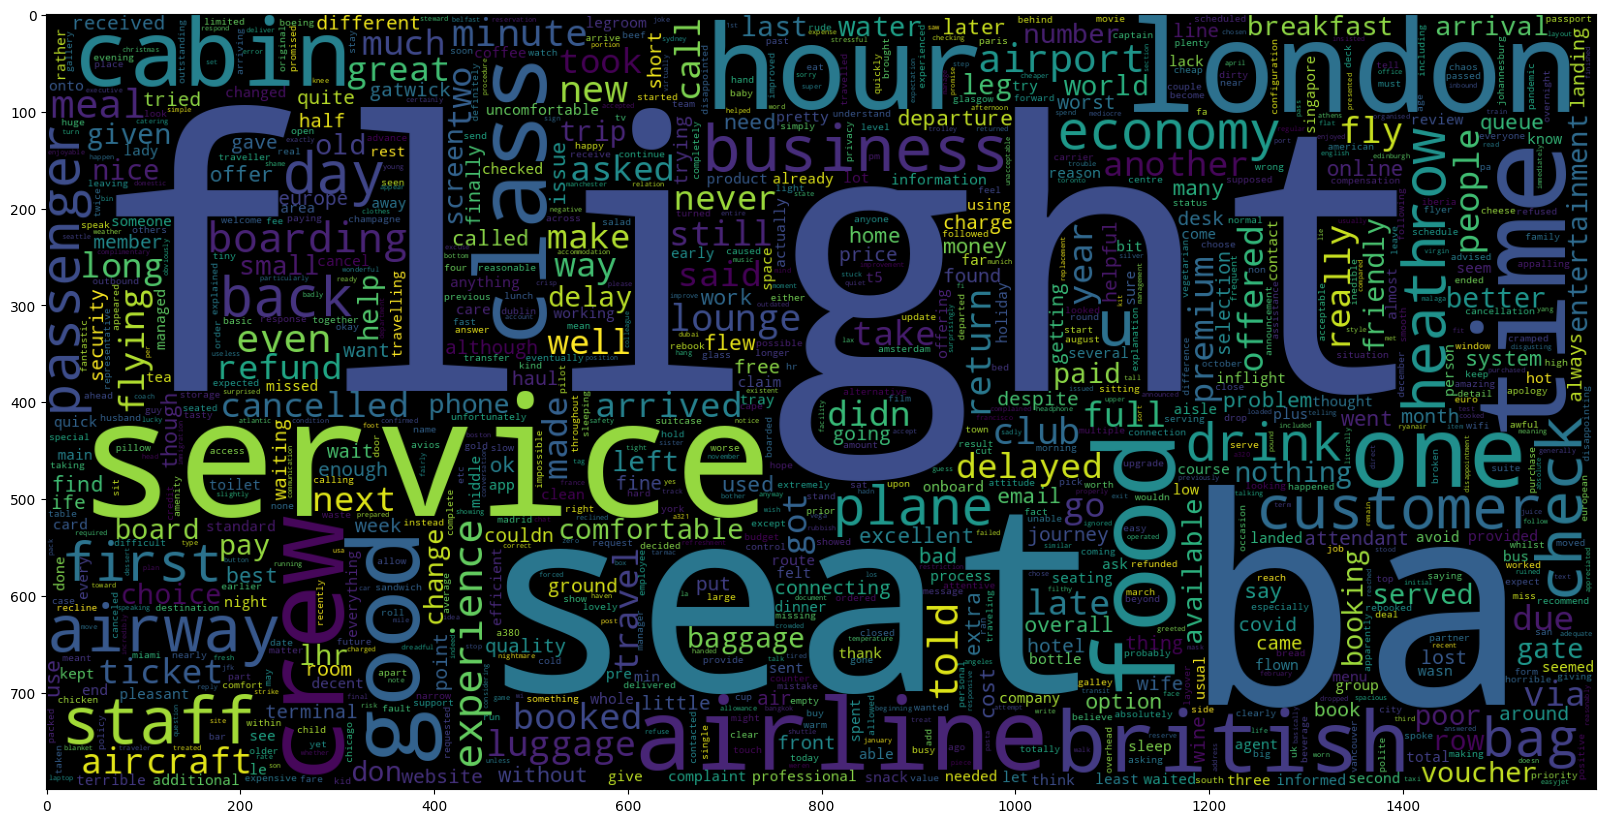

In [81]:
from wordcloud import WordCloud
df=df.astype(str)
final = processing(df['reviews'])
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(final))
plt.imshow(wc)

In [82]:
def solve(df):
  word_counts = {}
  for i in range (1000):
    comment = df[i]
    words = comment.lower().split()
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
  return word_counts


In [83]:
word_dictionary = solve(final)

In [84]:
sorted_dict = dict(sorted(word_dictionary.items(),key=lambda item:item[1], reverse=True))
x , y = sorted_dict.keys(),sorted_dict.values()


In [85]:
X = []
Y = []
for key,value in sorted_dict.items():
  X.append(key)
  Y.append(value)

Text(0.5, 1.0, 'most repeated words and their frequency')

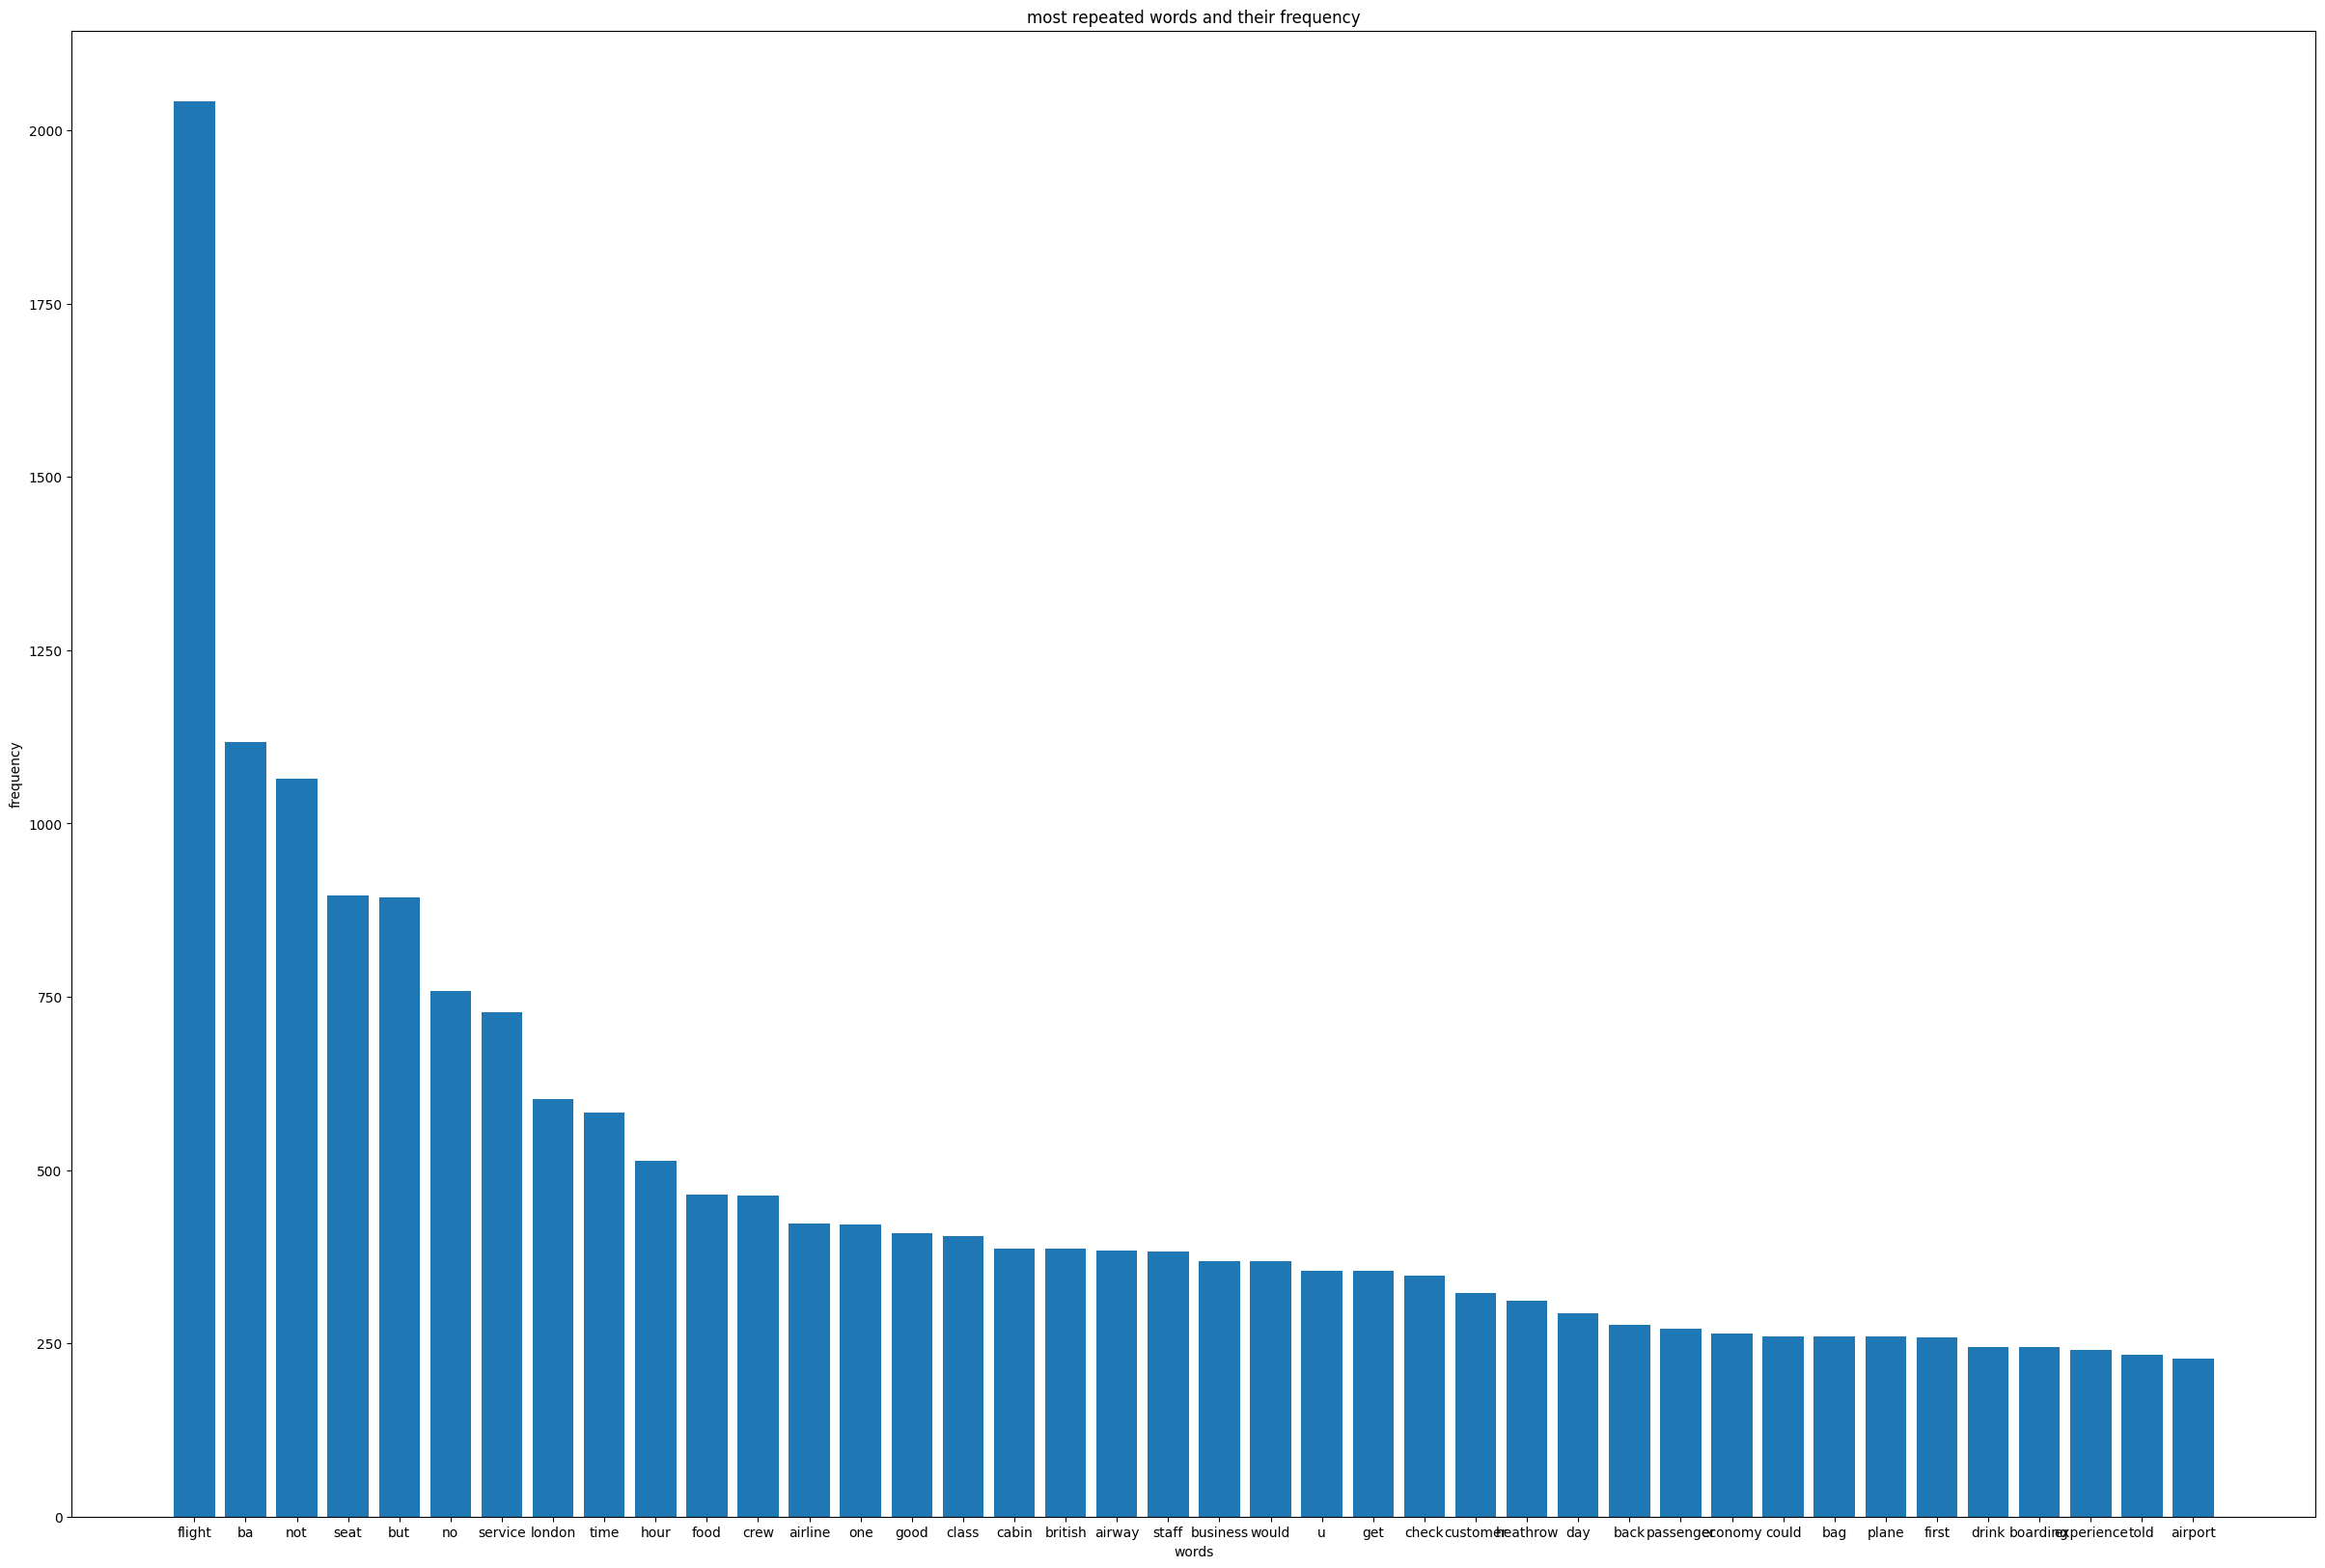

In [86]:
plt.figure(figsize=(30,20))
plt.bar(X[:40],Y[:40])
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("most repeated words and their frequency")

In [87]:
df.head()

,ratings,reviews
0,1,Came from Glasgow to London and took connecti...
1,1,My flight on on 12 May 2023 got delayed an ho...
2,2,Cairo is a 5 hour flight and BA considers it ...
3,1,After travelling London to Madrid with Britis...
4,1,My luggage was mis-tagged in Dallas on my way...


In [88]:
df['ratings'] = df['ratings'].astype(int)

In [89]:
df['ratings'].value_counts()

1     330
2     118
10    102
3      97
9      82
8      71
4      58
7      53
5      50
6      39
Name: ratings, dtype: int64

In [90]:
pos=0
neg=0
neu=0
for rating in df['ratings']:
  if rating > 5 :
    pos+=1
  elif rating < 5:
    neg+=1
  else :
    neu+=1
print("number of positive reviews are ",(pos/(pos+neg+neu)))
print("number of negative reviews are ",(neg/(pos+neg+neu)))
print("number of neutral reviews are ",(neu/(pos+neg+neu)))

number of positive reviews are  0.347
number of negative reviews are  0.603
number of neutral reviews are  0.05


<H1> TASK 2 </H1>

<h3> CLASSIFICATION PROBLEM </h3>

In [91]:
data = pd.read_csv('/content/drive/MyDrive/customer_booking.csv',encoding = "ISO-8859-1")
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [92]:
data.describe(include='all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000,50000,50000.000000,50000.00000,50000.00000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44382,49497,NaN,NaN,NaN,8102,2680,17872,NaN,NaN,NaN,NaN,NaN
mean,1.591240,NaN,NaN,84.940480,23.04456,9.06634,NaN,NaN,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,NaN,NaN,90.451378,33.88767,5.41266,NaN,NaN,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,NaN,NaN,0.000000,0.00000,0.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.00000,5.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.00000,9.00000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.00000,13.00000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


In [93]:
data.isnull()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [94]:
print(data.shape)
print(data.dtypes)

(50000, 14)
num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object


In [95]:
data['route'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [96]:
data['booking_origin'].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [97]:
data['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [98]:
data['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [99]:
data['flight_day'].value_counts()

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

In [100]:
data.drop(['route','booking_origin'],axis=1,inplace=True)
data['trip_type'].replace({'RoundTrip':0,'OneWay':1,'CircleTrip':0},inplace=True)
data['sales_channel'].replace({'Internet':0,'Mobile':1},inplace=True)
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,Sat,1,0,0,5.52,0
1,1,0,0,112,20,3,Sat,0,0,0,5.52,0
2,2,0,0,243,22,17,Wed,1,1,0,5.52,0
3,1,0,0,96,31,4,Sat,0,0,1,5.52,0
4,2,0,0,68,22,15,Wed,1,0,1,5.52,0


In [101]:
data.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [102]:
data.corr()

<ipython-input-102-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,-0.002457,-0.002195,0.212606,-0.115850,0.015607,0.120404,0.028544,0.022943,-0.063169,0.024116
sales_channel,-0.002457,1.000000,-0.018415,-0.013399,-0.060352,0.022375,-0.054254,0.032943,-0.022235,-0.038629,-0.041060
trip_type,-0.002195,-0.018415,1.000000,0.006452,-0.013053,0.003050,0.007847,-0.007953,-0.014442,0.040666,-0.024240
purchase_lead,0.212606,-0.013399,0.006452,1.000000,-0.076560,0.035973,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.060352,-0.013053,-0.076560,1.000000,-0.024872,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.022375,0.003050,0.035973,-0.024872,1.000000,-0.011434,0.012171,0.013014,-0.002101,0.007127
wants_extra_baggage,0.120404,-0.054254,0.007847,-0.022207,0.176757,-0.011434,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,0.032943,-0.007953,-0.004499,0.032264,0.012171,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022235,-0.014442,-0.022653,0.098828,0.013014,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,-0.038629,0.040666,0.067866,0.141181,-0.002101,0.057054,0.101289,0.154312,1.000000,-0.106266


Text(0.5, 1.0, 'frequency of the number of flights during different time')

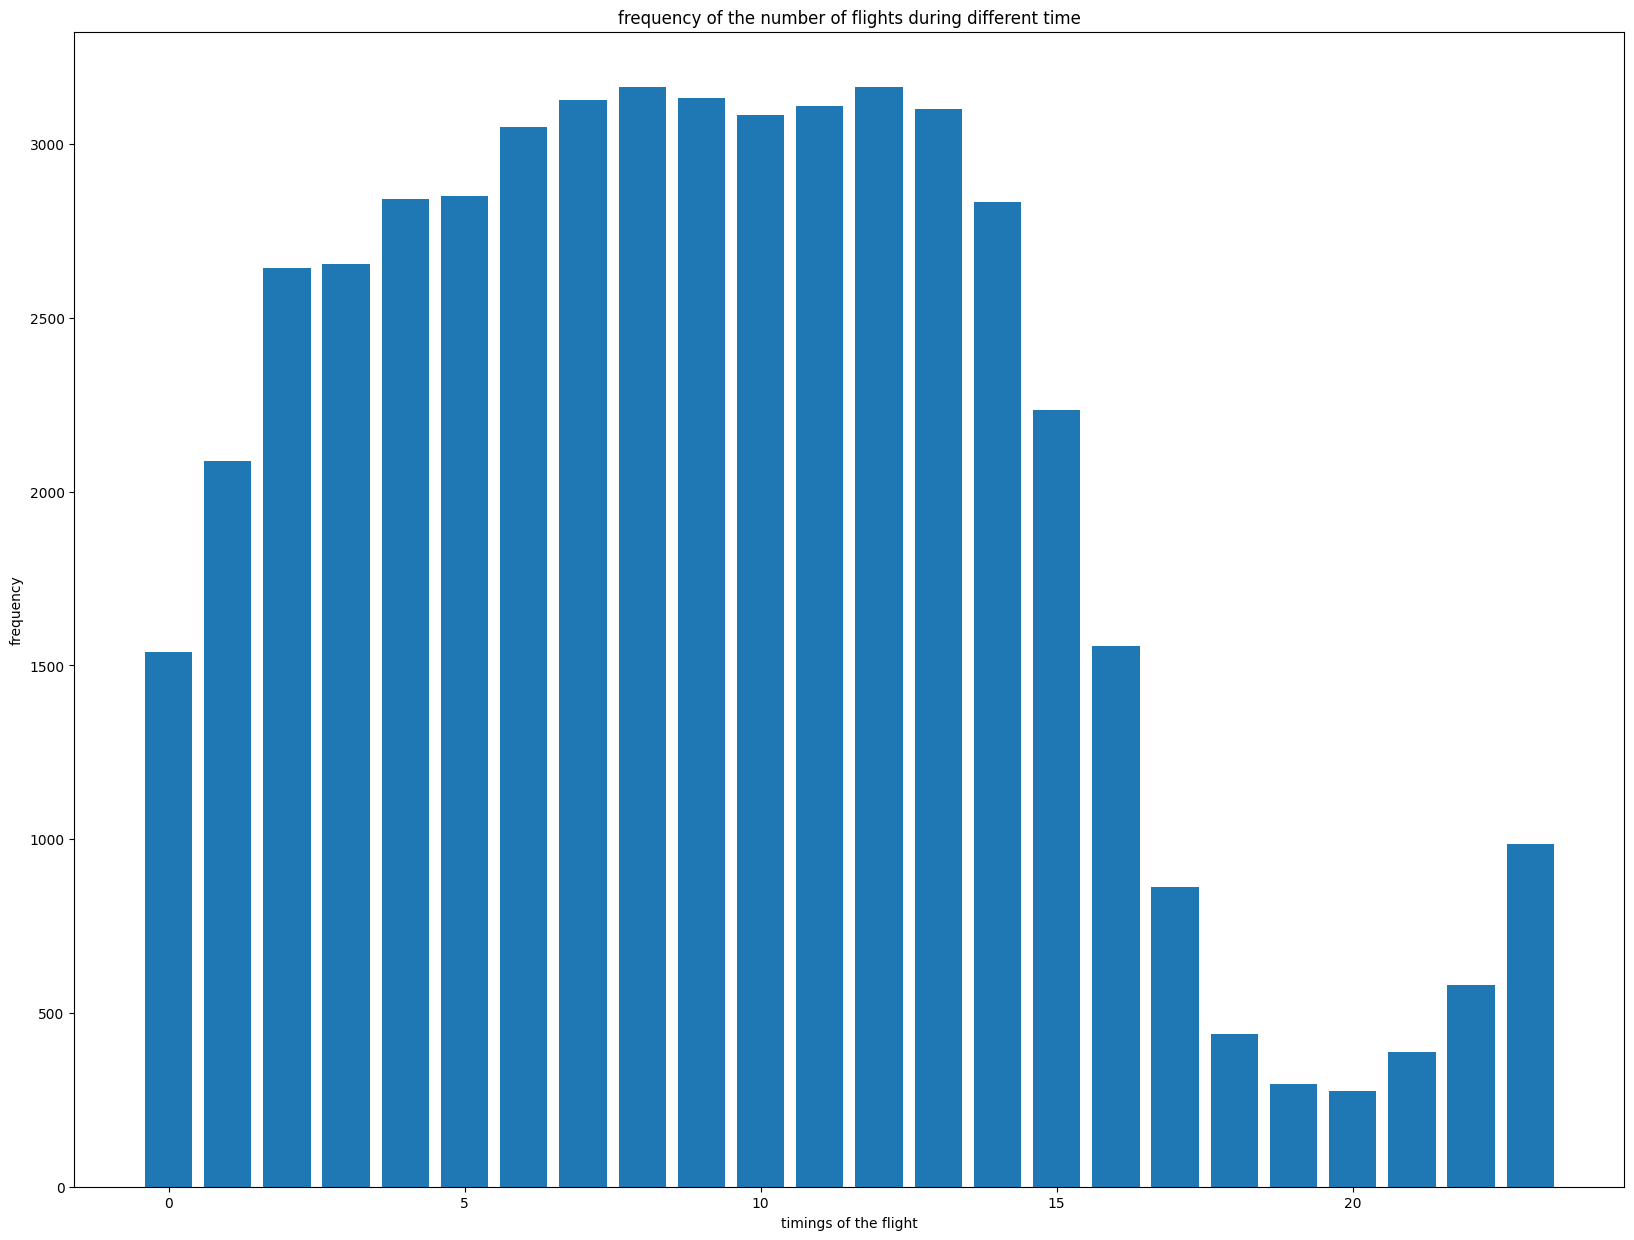

In [103]:
plt.figure(figsize=(20,15))
X = data.groupby('flight_hour').size().reset_index(name='number_of')
#Y = data.groupby('flight_hour').size()
plt.bar(X['flight_hour'],X['number_of'])
plt.xlabel("timings of the flight")
plt.ylabel("frequency")
plt.title("frequency of the number of flights during different time")


In [104]:
data['flight_hour'].replace({0:1,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:1,12:1,13:1,14:1,15:1,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0},inplace=True)

In [105]:
data['flight_day'].replace({'Sun':0,'Sat':1,'Fri':2,'Thu':3,'Wed':4,'Tue':5,'Mon':6},inplace=True)

In [106]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,1,1,1,0,0,5.52,0
1,1,0,0,112,20,1,1,0,0,0,5.52,0
2,2,0,0,243,22,0,4,1,1,0,5.52,0
3,1,0,0,96,31,1,1,0,0,1,5.52,0
4,2,0,0,68,22,1,4,1,0,1,5.52,0


In [107]:
data.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
score = {}
def helper(n):
  y = data['booking_complete']
  x = data.drop(['booking_complete'],axis=1)
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=34)
  rf = RandomForestClassifier(n_estimators=n, random_state=42)
  rf.fit(x_train,y_train)
  y_pred = rf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  cm = confusion_matrix(y_test, y_pred)
  score[n]=accuracy
  return cm,rf


In [109]:
for i in range(1,100):
  helper(i)

In [110]:
score = dict(sorted(score.items(),key=lambda item:item[1],reverse=True))
score

{38: 0.8384666666666667,
 94: 0.8382666666666667,
 96: 0.8382666666666667,
 98: 0.838,
 78: 0.8379333333333333,
 92: 0.8379333333333333,
 95: 0.8378666666666666,
 76: 0.8378,
 99: 0.8378,
 36: 0.8377333333333333,
 40: 0.8377333333333333,
 93: 0.8377333333333333,
 16: 0.8376666666666667,
 26: 0.8376,
 34: 0.8376,
 50: 0.8376,
 66: 0.8376,
 72: 0.8376,
 48: 0.8375333333333334,
 74: 0.8375333333333334,
 90: 0.8375333333333334,
 14: 0.8374666666666667,
 18: 0.8374666666666667,
 58: 0.8374666666666667,
 80: 0.8374,
 28: 0.8373333333333334,
 70: 0.8373333333333334,
 24: 0.8372666666666667,
 30: 0.8372666666666667,
 22: 0.8372,
 82: 0.8372,
 91: 0.8372,
 88: 0.8371333333333333,
 60: 0.8370666666666666,
 62: 0.8370666666666666,
 68: 0.8370666666666666,
 79: 0.8370666666666666,
 97: 0.8370666666666666,
 20: 0.837,
 64: 0.837,
 73: 0.837,
 86: 0.837,
 32: 0.8369333333333333,
 46: 0.8369333333333333,
 56: 0.8369333333333333,
 81: 0.8369333333333333,
 84: 0.8369333333333333,
 54: 0.836866666666666

In [115]:
cm,rf = helper(38)
cm

array([[12379,   355],
       [ 2068,   198]])

In [112]:
TP = 12379
FP = 355
FN = 2068
TN = 198

In [113]:
Acc = (TP + TN) / (TP + TN + FP + FN)
Recall = TP/(TP+FN)
Precision = TP/(TP+FP)
F1_score = (2*Precision*Recall)/(Precision+Recall)
print("Accuracy : ",Acc)
print("Recall : ",Recall)
print("Precision : ",Precision)
print("F1-Score : ",F1_score)

Accuracy :  0.8384666666666667
Recall :  0.8568560946909393
Precision :  0.972121878435684
F1-Score :  0.9108568485339023


In [126]:
importance_values = rf.feature_importances_
importance_values

array([0.0631988 , 0.0120605 , 0.00179404, 0.39525977, 0.19526487,
       0.01947075, 0.12507251, 0.01070151, 0.01713372, 0.02235551,
       0.13768801])

<H1>CONCLUSION</H1>

<p>The features that influenced the booking of tickets are

* purchase_lead
* flight duration
* length of stay
</p>